In [1]:
%matplotlib notebook

In [2]:
import re
from path import Path

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
from pandas import Series, DataFrame, read_csv

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
PED_FILE = Path('HACK_15_one.ped')
PED_REGEX = re.compile(r'(^\d+) (\w+) (\d) (\d) (-?\d) (-?\d) (.*)',
                       re.MULTILINE)

In [6]:
PED = DataFrame.from_dict(
    dict(enumerate(list(p[:6]) +
                   [''.join(pair) for pair in
                   re.findall(r'(\w)\s+(\w)', p[6], re.MULTILINE)]
                   for p in PED_REGEX.findall(PED_FILE.text()))),
    orient='index')

In [7]:
PED_CLEAN = PED[PED[5] != '-9']

In [12]:
PED_COLOR = PED_CLEAN[5]

In [8]:
PED_ONE_HOT = pandas.get_dummies(
    PED_CLEAN[[4] + list(range(6, len(PED_CLEAN.columns)))])\

In [10]:
PED_HOT = PED_ONE_HOT.drop(
    [c for c in PED_ONE_HOT.columns if c.endswith('_00')],
    axis='columns')

In [13]:
hot_train, hot_test, color_train, color_test = (
    train_test_split(PED_HOT, PED_COLOR))

In [14]:
clf = RandomForestClassifier()

In [15]:
clf.fit(hot_train, color_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
(clf.predict(hot_test) == color_test).describe()

count     1194
unique       2
top       True
freq       939
Name: 5, dtype: object

In [17]:
importance = Series(np.zeros(len(PED_CLEAN.columns) - 6))
for imp, colname in zip(clf.feature_importances_, hot_train.columns):
    if not colname.startswith('4_'):
        importance[int(colname.split('_')[0]) - 6] += imp

<IPython.core.display.Javascript object>


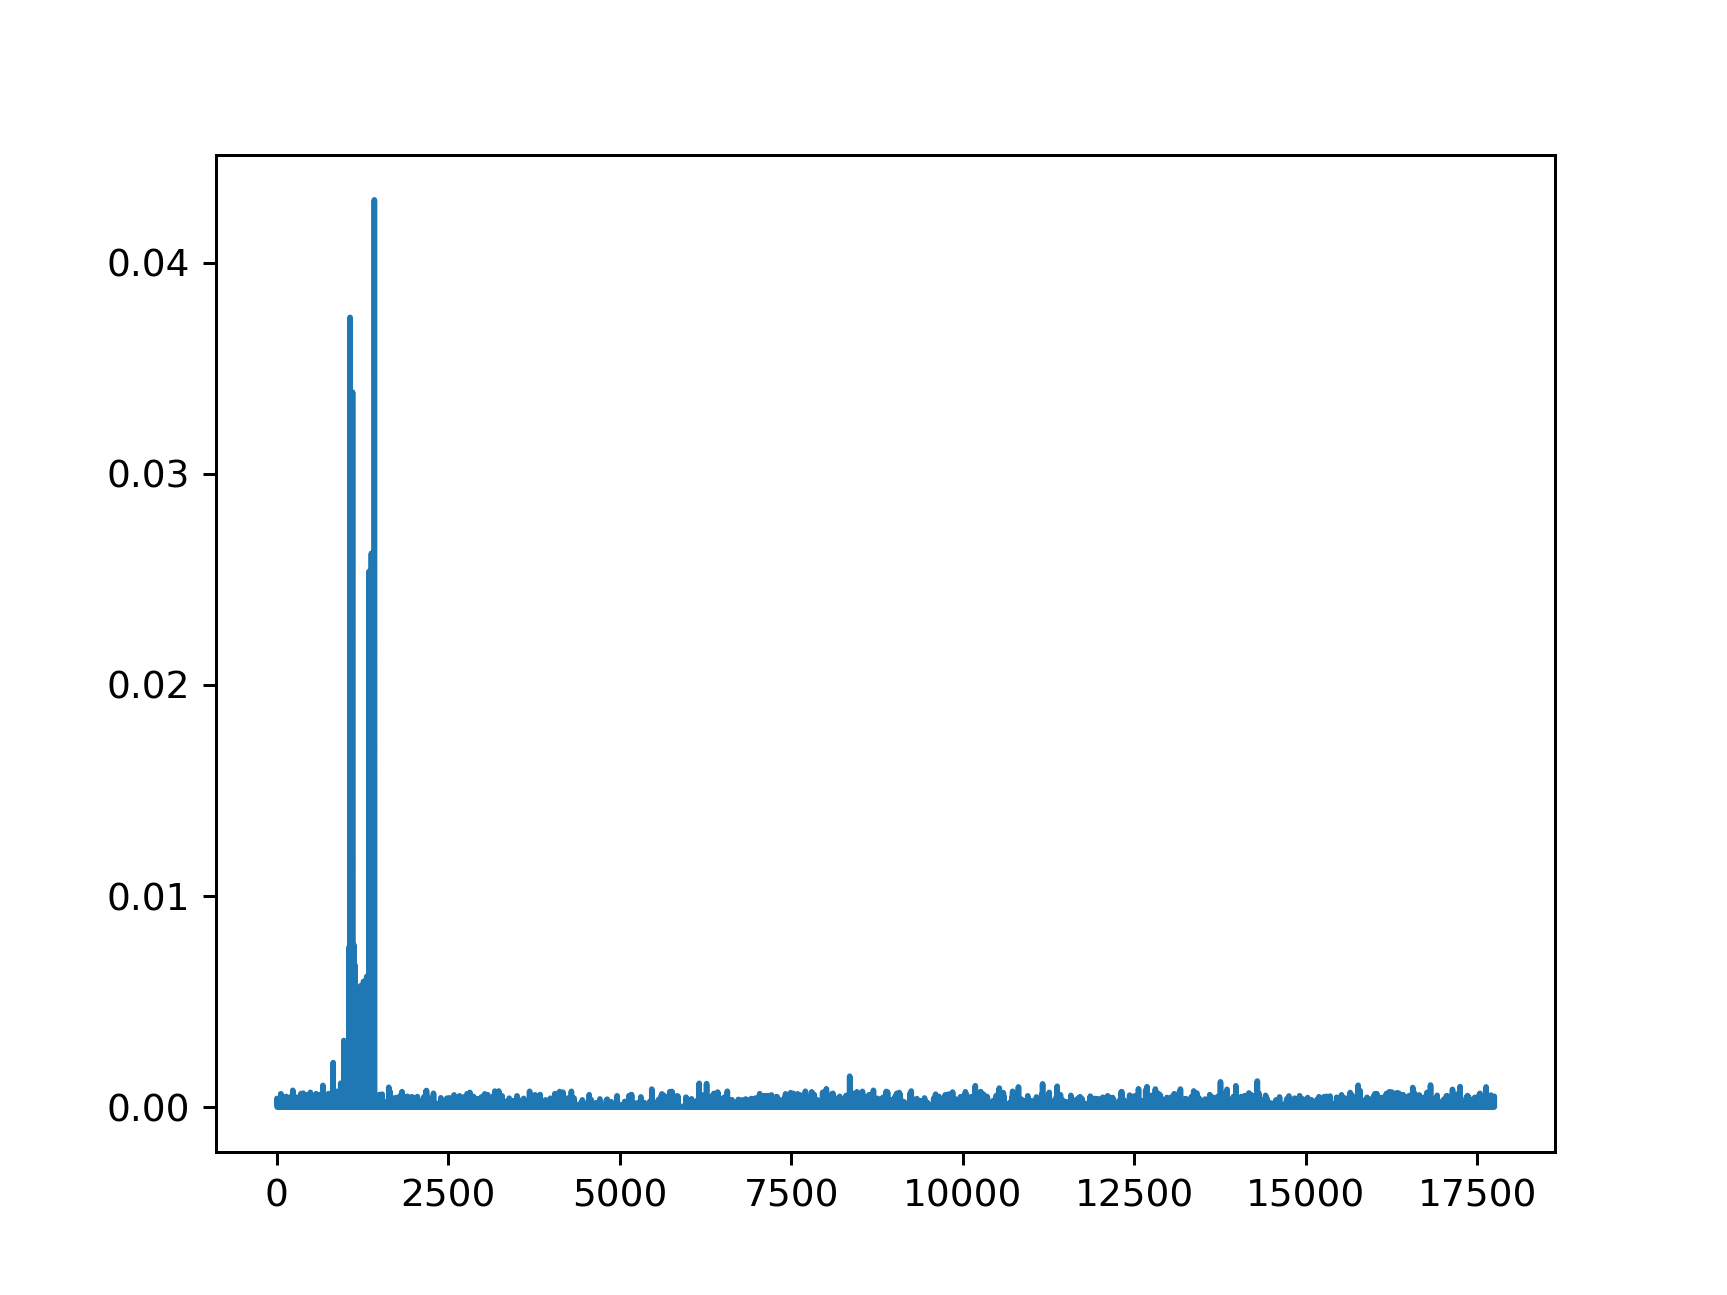

In [18]:
importance.plot()

In [19]:
importance[importance > 0.003]

976     0.003155
1056    0.007600
1058    0.004583
1059    0.005005
1067    0.037413
1103    0.033874
1120    0.007700
1141    0.006707
1175    0.005572
1221    0.005751
1264    0.005959
1306    0.003221
1310    0.006188
1345    0.025382
1378    0.026233
1389    0.010401
1421    0.042980
dtype: float64

In [22]:
MAP_DATA = read_csv('HACK_15_one.map', sep='\t', header=None)

In [23]:
for index in importance[importance > 0.003].index:
    print(np.array(MAP_DATA[1])[index])

exm1143095
rs7174027
rs4778241
rs7495174
rs1129038
exm-rs12913832
rs3935591
rs11636232
rs61756152
rs61756153
rs2238289
rs118112076
rs201872292
rs2240203
exm-rs916977
rs8039195
exm-rs1667394
